In [41]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
digit_data_path = '/Users/maxperozek/ML-CP341/6/optdigits.txt'

with open(digit_data_path, 'r') as f:
    lines = f.readlines()

In [3]:
lines

['BU handwritten digit database: E Alpaydin C Kaynak 1995\n',
 'Training file\n',
 '\n',
 'entwidth = 32\n',
 'entheight = 32\n',
 'depth = 1\n',
 'density = 300\n',
 'whitepix = 0\n',
 'ntot = 1934\n',
 'ndigit = 1934\n',
 'nlower = 0\n',
 'nupper = 0\n',
 'nparag = 0\n',
 'firstdigit = 0\n',
 'lastdigit = 0\n',
 'firstlower = 0\n',
 'lastlower = 0\n',
 'firstupper = 0\n',
 'lastupper = 0\n',
 'firstparag = 0\n',
 'lastparag = 0\n',
 '00000000000001111000000000000000\n',
 '00000000000011111110000000000000\n',
 '00000000001111111111000000000000\n',
 '00000001111111111111100000000000\n',
 '00000001111111011111100000000000\n',
 '00000011111110000011110000000000\n',
 '00000011111110000000111000000000\n',
 '00000011111110000000111100000000\n',
 '00000011111110000000011100000000\n',
 '00000011111110000000011100000000\n',
 '00000011111100000000011110000000\n',
 '00000011111100000000001110000000\n',
 '00000011111100000000001110000000\n',
 '00000001111110000000000111000000\n',
 '00000001111110

In [4]:
for i in range(len(lines)):
    lines[i] = lines[i].strip()

In [13]:
lines = lines[21:]

In [34]:
len(lines) / 33

1934.0

In [28]:
dig_list = []

for i in range(len(lines)):
    if i % 33 == 0:
        dig_list.append(lines[i-33:i])

In [40]:
dig_list = dig_list[1:]

In [44]:
all_digit_mats = []

for dig in dig_list:
    im_mat = np.empty((32,32))
    for i in range(32):
        for j in range(32):
            im_mat[i,j] = dig[i][j]
    
    all_digit_mats.append((im_mat, dig[32]))
        
    

0


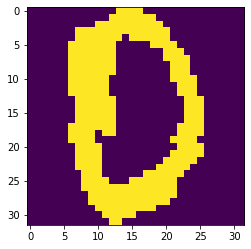

In [49]:
plt.imshow(all_digit_mats[0][0])
print(all_digit_mats[0][1])

7


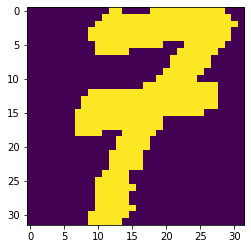

In [48]:
plt.imshow(all_digit_mats[10][0])
print(all_digit_mats[10][1])

In [50]:
# yup these look good to me...

In [77]:
flattened_dataset = np.squeeze(np.array([ item[0].reshape((-1,1024)) for item in all_digit_mats]))

In [78]:
flattened_dataset.shape

(1933, 1024)

In [79]:
labels = np.array([ item[1] for item in all_digit_mats]).astype('float')

In [80]:
labels.shape

(1933,)

In [81]:
from scipy.spatial.distance import cdist

In [91]:
# For K means:
# 1) Initialize with random clusters;
# 2) Assign Each point to its closest cluster center;
# 3) Recalculate Cluster Centers based on assignments;
# 4) Check if we've converged; if not, GOTO 2

# data_matrix: matrix of samples with len(data_matrix) = number of samples
# K: number of clusters
def kmeans(data_matrix, K, initial_centers=None):
    # init assignments to be a random cluster
    old_assignments = np.random.randint(low=0, high=K, size=data_matrix.shape[0])
    
    # init clusters to be input or to be K random samples from the data matrix
    if initial_centers is None:
        center_idxs = np.random.choice(np.arange(data_matrix.shape[0]),K)
        centers = data_matrix[center_idxs,:].copy()
    else:
        centers = initial_centers
    
    # set the initial value for distance to 
    distance = cdist(centers, data_matrix)
    # returns minimum value's index along 0th axis (this tells us which center a given sample is the closest to)
    assignments = np.argmin(distance, axis=0)
    
    for i in range(centers.shape[0]):
        # set each new center to the mean of the centers in the cluster 
        centers[i] = data_matrix[assignments==i,:].mean()
    
    while np.any(assignments != old_assignments):
        distance = cdist(centers, data_matrix)
        old_assignments = assignments.copy()
        assignments = np.argmin(distance, axis=0)
        for i in range(centers.shape[0]):
            centers[i] = data_matrix[assignments==i,:].mean(axis=0)
    
    return assignments, centers

In [105]:
assignments, centers = kmeans(flattened_dataset, 10)

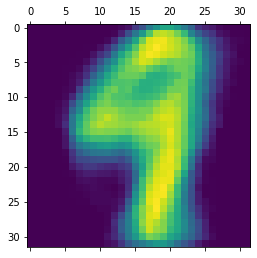

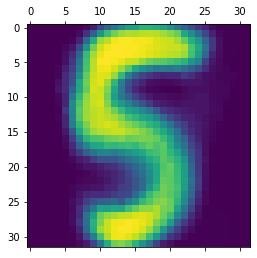

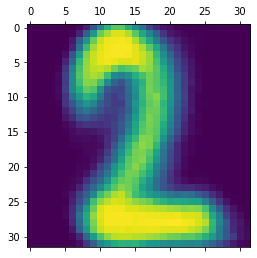

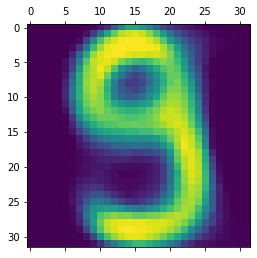

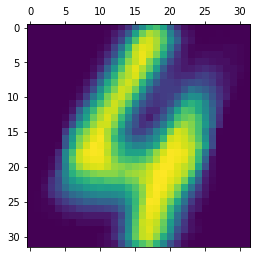

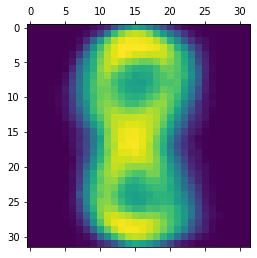

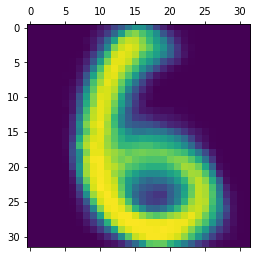

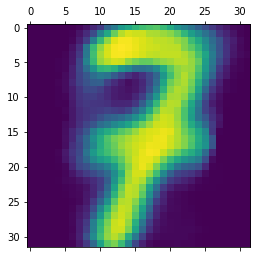

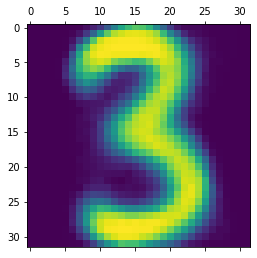

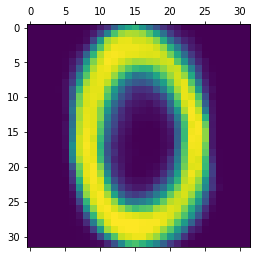

In [106]:
for i in range(centers.shape[0]):
    
    plt.matshow(centers[i,:].reshape((32,32)))

In [108]:
import torch

/Users/maxperozek/opt/anaconda3/envs/comp_gr_thy/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [109]:
# torch.save([centers, assignments], 'decent clusters.pt')

Text(0, 0.5, 'actual digit label')

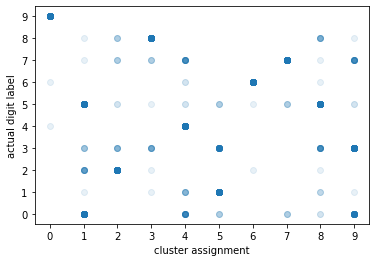

In [107]:
plt.scatter(labels, assignments, alpha=0.1)

plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))


plt.xlabel('cluster assignment')
plt.ylabel('actual digit label')

In [119]:
label_assignment_pairs = []
for i in range(len(labels)):    
    label_assignment_pairs.append((labels[i], assignments[i]))

dtype = [('label', float), ('assignment', int)]
label_assignment_pairs = np.array(label_assignment_pairs, dtype=dtype)

In [121]:
sorted_list = np.sort(label_assignment_pairs, order='assignment')

In [123]:
for lab, assgnt in sorted_list:
    print(lab, assgnt)

1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
4.0 0
5.0 0
5.0 0
5.0 0
5.0 0
7.0 0
7.0 0
7.0 0
7.0 0
8.0 0
8.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
9.0 0
1.0 1
3.0 1
4.0 1
4.0 1
4.0 1
4.0 1
4.0 1
4.0 1
4.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 1
5.0 